## RELATÓRIO ESTATÍSTICO - MINERAÇĀO DE DADOS 2017.1

Estudo da base de dados, dos atributos bem como os tratamentos feitos nas colunas sāo apresentados nesse primeiro momento. É dedicada uma seçāo para vizualiçāo dos dados bem como os comportamento destes. Logo em seguida realizamos as eliminações e os tratamentos nas colunas escolhidas.

Na segunda parte, utilizamos classificadores e técnicas de avaliaçāo para medir a performance da classificaçāo dos dados utilizando SVM, Rede Neural MLP e Random Forests. Depois aplicamos técnicas de reduçāo de dimensāo e efetuamos mais uma execuçāo dos classificadores para analisar o desempenho na nova base.

In [1]:
# IMPORT BASICOS INICIAIS
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#LEITURA DA BASE EM SUA COMPLETUDE
df = pd.read_csv('data/BASE_DM_TARGET.txt', sep='	')
df.head()

,PESSOA_CD,DRR,MICRO_REGIAO,REGIAO_DESENVOLVIMENTO,SEGMENTO_ECONOMICO_CD,CEP1,CEP2,CEP3,CEP4,CNAE_P1,...,PADRAO_A1,PADRAO_A2,PADRAO_A3,PADRAO_A4,PADRAO_A5,ARREC_ULTIMOS_12M,ARREC_ULTIMOS_6M,VREF,MDB,ALVO_FINAL
0,1740401,I,RECIFE,REGIAO METROPOLITANA DO RECIFE,9,5,50,500,5002,47,...,0,0,0,0,0,A,A,0,N,0
1,1740402,I,RECIFE,REGIAO METROPOLITANA DO RECIFE,7,5,52,520,5205,31,...,0,0,0,0,0,A,A,0,N,0
2,1740403,I,RECIFE,REGIAO METROPOLITANA DO RECIFE,9,5,50,506,5067,47,...,0,0,0,0,0,A,A,0,N,0
3,1740407,I,RECIFE,REGIAO METROPOLITANA DO RECIFE,7,5,50,507,5072,17,...,0,0,0,0,0,A,A,0,N,0
4,1740408,I,RECIFE,REGIAO METROPOLITANA DO RECIFE,17,5,50,501,5010,56,...,0,0,0,0,0,A,A,0,N,0


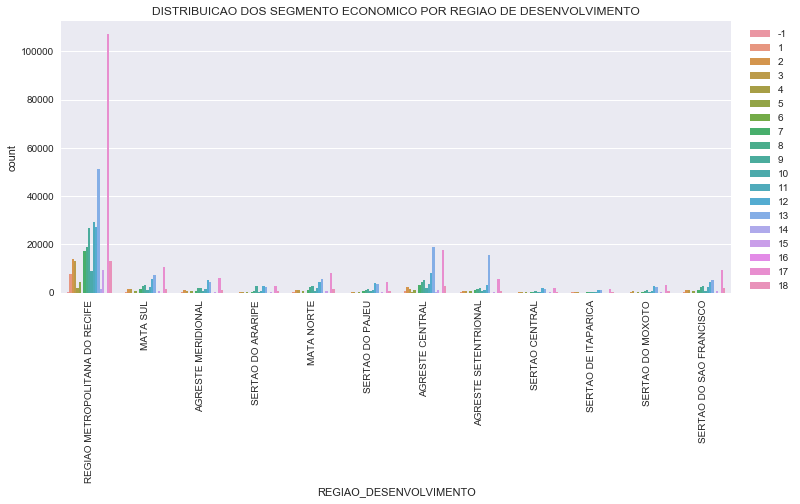

In [3]:
plt.figure(figsize=(12,5))
sns.countplot(x='REGIAO_DESENVOLVIMENTO', hue='SEGMENTO_ECONOMICO_CD', data=df)
plt.title('DISTRIBUICAO DOS SEGMENTO ECONOMICO POR REGIAO DE DESENVOLVIMENTO')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.1, 1))

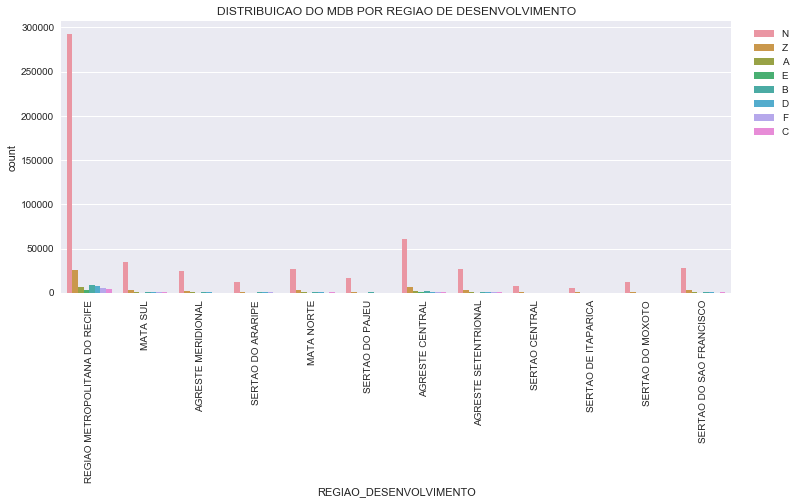

In [4]:
plt.figure(figsize=(12,5))
sns.countplot(x='REGIAO_DESENVOLVIMENTO', hue='MDB', data=df)
plt.title('DISTRIBUICAO DO MDB POR REGIAO DE DESENVOLVIMENTO')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.1, 1))

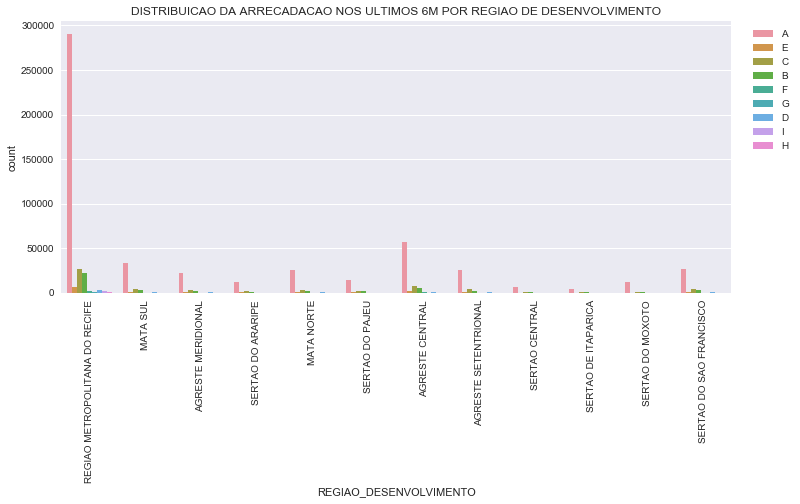

In [5]:
plt.figure(figsize=(12,5))
sns.countplot(x='REGIAO_DESENVOLVIMENTO', hue='ARREC_ULTIMOS_6M', data=df)
plt.title('DISTRIBUICAO DA ARRECADACAO NOS ULTIMOS 6M POR REGIAO DE DESENVOLVIMENTO')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.1, 1))

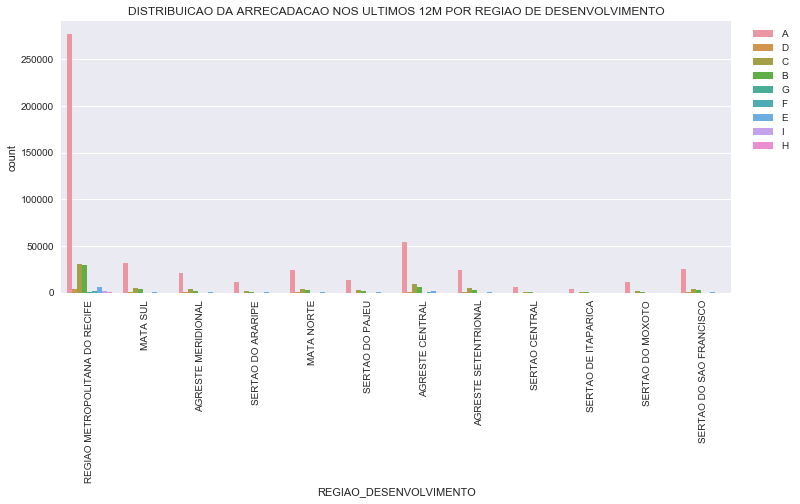

In [6]:
plt.figure(figsize=(12,5))
sns.countplot(x='REGIAO_DESENVOLVIMENTO', hue='ARREC_ULTIMOS_12M', data=df)
plt.title('DISTRIBUICAO DA ARRECADACAO NOS ULTIMOS 12M POR REGIAO DE DESENVOLVIMENTO')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.1, 1))

In [7]:
df.columns

Index([u'PESSOA_CD', u'DRR', u'MICRO_REGIAO', u'REGIAO_DESENVOLVIMENTO',
       u'SEGMENTO_ECONOMICO_CD', u'CEP1', u'CEP2', u'CEP3', u'CEP4',
       u'CNAE_P1', u'CNAE_P2', u'CNAE_P3', u'CNAE_P4', u'CNAE_S11',
       u'CNAE_S12', u'CNAE_S13', u'CNAE_S14', u'CNAE_S21', u'CNAE_S22',
       u'CNAE_S23', u'CNAE_S24', u'CNAE_S31', u'CNAE_S32', u'CNAE_S33',
       u'CNAE_S34', u'CNAE_S41', u'CNAE_S42', u'CNAE_S43', u'CNAE_S44',
       u'CNAE_S51', u'CNAE_S53', u'CNAE_S52', u'CNAE_S54',
       u'NATUREZA_JURIDICA_CD', u'CONTADOR_PESSOA_CD', u'CONTADOR_UF',
       u'REATIVADO', u'PADRAO_A1', u'PADRAO_A2', u'PADRAO_A3', u'PADRAO_A4',
       u'PADRAO_A5', u'ARREC_ULTIMOS_12M', u'ARREC_ULTIMOS_6M', u'VREF',
       u'MDB', u'ALVO_FINAL'],
      dtype='object')

## COLUNA: SEGMENTO ECONOMICO

In [8]:
# SEGMENTO_ECONOMICO_CD == -1 SERAO TRATADOS COMO NAO EXISTENTES
df['SEGMENTO_ECONOMICO_CD'] = df['SEGMENTO_ECONOMICO_CD'].replace(-1, np.nan)
df['SEGMENTO_ECONOMICO_CD'].unique()

array([  9.,   7.,  17.,  12.,  13.,  18.,   2.,   1.,   8.,  10.,   3.,
         5.,  11.,  15.,   4.,  14.,  nan,  16.,   6.])

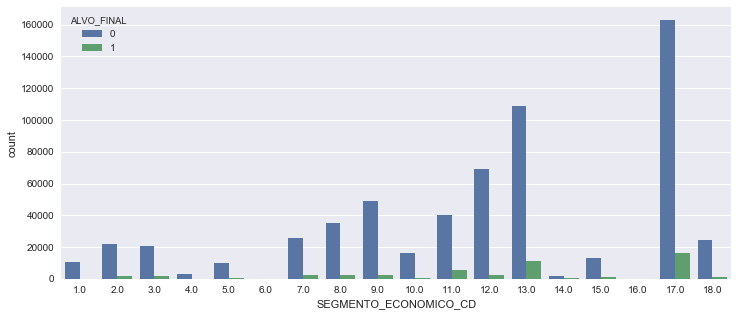

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x='SEGMENTO_ECONOMICO_CD', hue='ALVO_FINAL', data=df)

## COLUNA: CEP

In [10]:
# CEP == 0 SERAO TRATADOS COMO NAO EXISTENTES
df['CEP4'] = df['CEP4'].replace(0, np.nan)
sum(df['CEP4'] == 0)

0

## COLUNA: CNAE_P4

In [11]:
# COLUNA: CNAE_P4
# TOTAL NUMERO DE INSTANCIAS
print('TOTAL DE INSTANCIAS: {}'.format(len(df['CNAE_P4'])))

# NUMERO DE VALORES UNICOS
print('VALORES UNICOS: {}'.format(df['CNAE_P4'].nunique()))

# 620 COLUNAS CATEGORICAS ? -> FAZER ANALISE POSTERIOR DA RELEVANCIA DESSA COLUNA

TOTAL DE INSTANCIAS: 662942
VALORES UNICOS: 620


## COLUNA: NATUREZA_JURIDICA_CD

In [12]:
# COLUNA: NATUREZA_JURIDICA_CD
# TOTAL NUMERO DE INSTANCIAS
print('TOTAL DE INSTANCIAS: {}'.format(len(df['NATUREZA_JURIDICA_CD'])))

# NUMERO DE VALORES UNICOS
print('VALORES UNICOS: {}'.format(df['NATUREZA_JURIDICA_CD'].nunique()))

df['NATUREZA_JURIDICA_CD'].unique()

TOTAL DE INSTANCIAS: 662942
VALORES UNICOS: 16


array([23, 33, 28, 29, 24, 67, 37, 36, 26, 25, 34, 35, 27, 44, 38, 39])

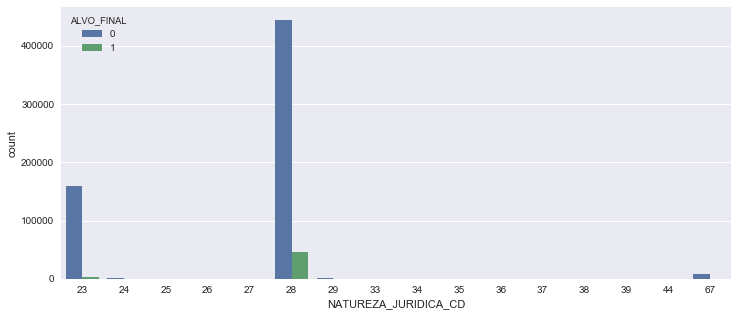

In [13]:
plt.figure(figsize=(12,5))
sns.countplot(x='NATUREZA_JURIDICA_CD', hue='ALVO_FINAL', data=df)

## COLUNA: CONTADOR_PESSOA_CD

In [14]:
# COLUNA: CONTADOR_PESSOA_CD
# TOTAL NUMERO DE INSTANCIAS
print('TOTAL DE INSTANCIAS: {}'.format(len(df['CONTADOR_PESSOA_CD'])))

# NUMERO DE VALORES UNICOS
print('VALORES UNICOS: {}'.format(df['CONTADOR_PESSOA_CD'].nunique()))

df['CONTADOR_PESSOA_CD'].unique()

print('INSTANCIAS NULAS: {}'.format(sum(df['CONTADOR_PESSOA_CD'] == 0)))

df['CONTADOR_PESSOA_CD'] = df['CONTADOR_PESSOA_CD'].replace(0, np.nan)
print('INSTANCIAS NULAS APOS SUBSTITUICAOS: {}'.format(sum(df['CONTADOR_PESSOA_CD'] == 0)))

TOTAL DE INSTANCIAS: 662942
VALORES UNICOS: 7842
INSTANCIAS NULAS: 451899
INSTANCIAS NULAS APOS SUBSTITUICAOS: 0


## COLUNA: REATIVADO

In [15]:
# COLUNA: CONTADOR_PESSOA_CD
# TOTAL NUMERO DE INSTANCIAS
print('TOTAL DE INSTANCIAS: {}'.format(len(df['REATIVADO'])))

# NUMERO DE VALORES UNICOS
print('VALORES UNICOS: {}'.format(df['REATIVADO'].nunique()))

df['REATIVADO'].unique()

TOTAL DE INSTANCIAS: 662942
VALORES UNICOS: 2


array([1, 0])

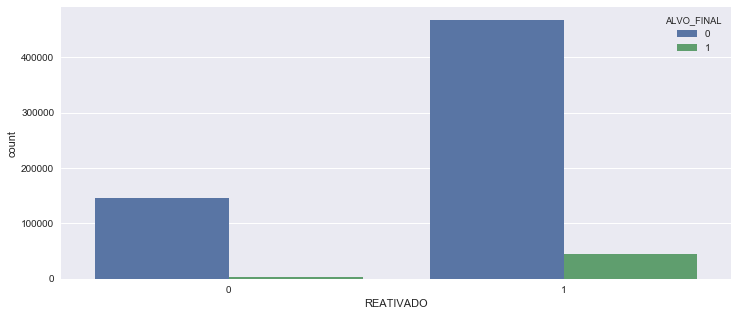

In [16]:
plt.figure(figsize=(12,5))
sns.countplot(x='REATIVADO', hue='ALVO_FINAL', data=df)

## COLUNAS: PADRAO_A* - (1 -5)

In [17]:
patterns = ['PADRAO_A1', 'PADRAO_A2', 'PADRAO_A3', 'PADRAO_A4', 'PADRAO_A5']
df[patterns].head()

,PADRAO_A1,PADRAO_A2,PADRAO_A3,PADRAO_A4,PADRAO_A5
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


In [18]:
# VALORES UNICOS DE CADA PADRAO
# 0 - SERA TRATADO COMO NAO EXISTENTE
for col in patterns:
    print('TOTAL DE INSTANCIAS: {}'.format(len(df[col])))
    print('INSTANCIAS NULAS: {}'.format(sum(df[col] == 0)))
    print('TOTAL VALORES UNICOS {}: {}'.format(col, df[col].nunique()))
    print df[col].unique()
    df[col] = df[col].replace(0, np.nan)

TOTAL DE INSTANCIAS: 662942
INSTANCIAS NULAS: 532298
TOTAL VALORES UNICOS PADRAO_A1: 79
[           0 111111111111 111111110000 111111111110 111111100000
 111110000000 111100000000 110000000000 100000000000 111111000000
 111111111000 111111111100 111000000000         1111            1
          111           11       111111        11111      1111111
           10          110          100         1110         1000
         1100     11111111        11110        11100        11000
        10000    111111111       110000       111100       111000
       111110   1111111111      1111110       100000      1111100
      1100000      1110000      1000000      1111000     11111100
  11111111111     11110000     11111110     11000000     11111000
     11100000     10000000   1111111100    111110000    111000000
    111100000    110000000    111111110    111111000    111111100
    100000000   1111000000   1111100000   1100000000   1111111110
   1111110000   1111111000   1110000000   1000000000  

In [19]:
df[patterns].head()

,PADRAO_A1,PADRAO_A2,PADRAO_A3,PADRAO_A4,PADRAO_A5
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN


## COLUNA: VREF

In [20]:
# COLUNA VREF - 0 SERA TRATADO COMO NAO EXISTENTE
# TOTAL NUMERO DE INSTANCIAS
print('TOTAL DE INSTANCIAS: {}'.format(len(df['VREF'])))

# NUMERO DE VALORES UNICOS
print('INSTANCIAS NULAS: {}'.format(sum(df['VREF'] == 0)))
print('TOTAL VALORES UNICOS {}: {}'.format('VREF', df['VREF'].nunique()))

df['VREF'].unique()
df['VREF'] = df['VREF'].replace(0, np.nan)
print('INSTANCIAS NULAS APOS: {}'.format(sum(df['VREF'] == 0)))

TOTAL DE INSTANCIAS: 662942
INSTANCIAS NULAS: 245248
TOTAL VALORES UNICOS VREF: 2732
INSTANCIAS NULAS APOS: 0


## COLUNA: MDB

In [21]:
# COLUNA MDB - 0 SERA TRATADO COMO NAO EXISTENTE
# TOTAL NUMERO DE INSTANCIAS
print('TOTAL DE INSTANCIAS: {}'.format(len(df['MDB'])))

# NUMERO DE VALORES UNICOS
print('INSTANCIAS NULAS: {}'.format(sum(df['MDB'] == 0)))
print('TOTAL VALORES UNICOS {}: {}'.format('MDB', df['MDB'].nunique()))

df['MDB'].unique()
# df['MDB'] = df['MDB'].replace(0, np.nan)
# print('INSTANCIAS NULAS APOS: {}'.format(sum(df['MDB'] == 0)))

TOTAL DE INSTANCIAS: 662942
INSTANCIAS NULAS: 0
TOTAL VALORES UNICOS MDB: 8


array(['N', 'Z', 'A', 'E', 'B', 'D', 'F', 'C'], dtype=object)

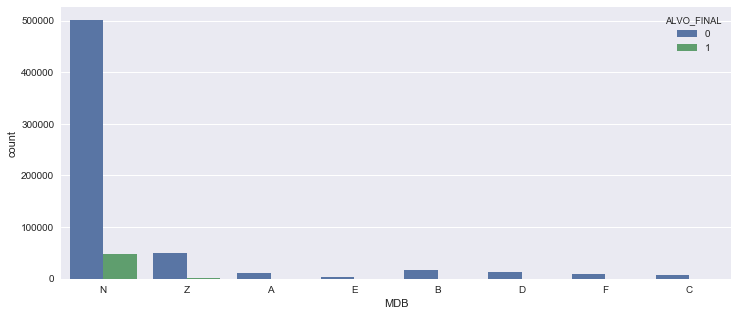

In [22]:
plt.figure(figsize=(12,5))
sns.countplot(x='MDB', hue='ALVO_FINAL', data=df)

## SELEÇĀO DAS COLUNAS CANDIDATAS

In [23]:
# COLUNAS FINAIS ESCOLHIDAS PARA INICIAR O TRATAMENTO DOS DADOS
columns = ['MICRO_REGIAO', 'REGIAO_DESENVOLVIMENTO', 'SEGMENTO_ECONOMICO_CD', 'CEP4', 'CNAE_P4',
           'NATUREZA_JURIDICA_CD', 'CONTADOR_PESSOA_CD', 'REATIVADO', 'PADRAO_A1', 'PADRAO_A2',
           'PADRAO_A3', 'PADRAO_A4', 'PADRAO_A5', 'VREF', 'MDB', 'ALVO_FINAL']
df[columns].head()

,MICRO_REGIAO,REGIAO_DESENVOLVIMENTO,SEGMENTO_ECONOMICO_CD,CEP4,CNAE_P4,NATUREZA_JURIDICA_CD,CONTADOR_PESSOA_CD,REATIVADO,PADRAO_A1,PADRAO_A2,PADRAO_A3,PADRAO_A4,PADRAO_A5,VREF,MDB,ALVO_FINAL
0,RECIFE,REGIAO METROPOLITANA DO RECIFE,9.0,5002.0,47423,23,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,N,0
1,RECIFE,REGIAO METROPOLITANA DO RECIFE,7.0,5205.0,31012,23,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,N,0
2,RECIFE,REGIAO METROPOLITANA DO RECIFE,9.0,5067.0,47440,33,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,N,0
3,RECIFE,REGIAO METROPOLITANA DO RECIFE,7.0,5072.0,17214,23,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,N,0
4,RECIFE,REGIAO METROPOLITANA DO RECIFE,17.0,5010.0,56112,23,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,N,0


## VIZUALIZACAO DE DADOS FALTOSOS

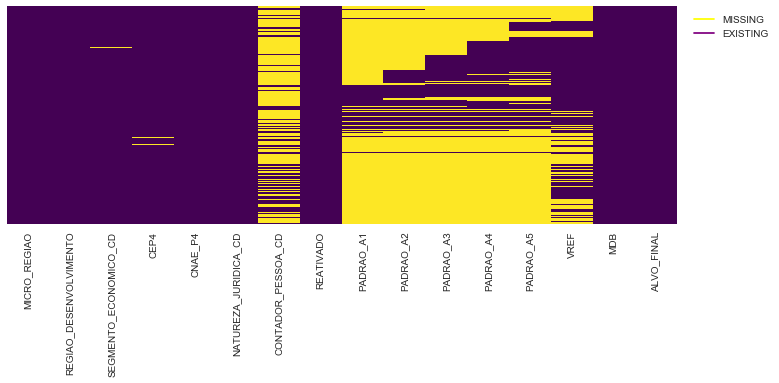

In [16]:
plt.figure(figsize=(12,4))
#FAKE PLOTS JUST TO DISPLAY THE LEGEND
plt.plot([], [], color='yellow', label='MISSING')
plt.plot([], [], color='purple', label='EXISTING')
# HEATMAP TO DISPLAY THE MISSING DATA
sns.heatmap(df[columns].isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.legend(bbox_to_anchor=(1.15, 1))

Questionamentos:
    - CEP sera mesmo necessario?
    - Colunas com muitos dados faltosos: ELIMINACAO VERTICAL
    - Colunas com poucos dados faltosos: ELIMINCACAO HORIZONTAL

In [24]:
df = df[columns]
df.head()

,MICRO_REGIAO,REGIAO_DESENVOLVIMENTO,SEGMENTO_ECONOMICO_CD,CEP4,CNAE_P4,NATUREZA_JURIDICA_CD,CONTADOR_PESSOA_CD,REATIVADO,PADRAO_A1,PADRAO_A2,PADRAO_A3,PADRAO_A4,PADRAO_A5,VREF,MDB,ALVO_FINAL
0,RECIFE,REGIAO METROPOLITANA DO RECIFE,9.0,5002.0,47423,23,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,N,0
1,RECIFE,REGIAO METROPOLITANA DO RECIFE,7.0,5205.0,31012,23,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,N,0
2,RECIFE,REGIAO METROPOLITANA DO RECIFE,9.0,5067.0,47440,33,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,N,0
3,RECIFE,REGIAO METROPOLITANA DO RECIFE,7.0,5072.0,17214,23,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,N,0
4,RECIFE,REGIAO METROPOLITANA DO RECIFE,17.0,5010.0,56112,23,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,N,0


In [25]:
to_be_eliminated = ['CONTADOR_PESSOA_CD', 'PADRAO_A1', 'PADRAO_A2', 'PADRAO_A3', 'PADRAO_A4', 'PADRAO_A5']
df.drop(labels=to_be_eliminated, axis=1, inplace=True)
df.head()

,MICRO_REGIAO,REGIAO_DESENVOLVIMENTO,SEGMENTO_ECONOMICO_CD,CEP4,CNAE_P4,NATUREZA_JURIDICA_CD,REATIVADO,VREF,MDB,ALVO_FINAL
0,RECIFE,REGIAO METROPOLITANA DO RECIFE,9.0,5002.0,47423,23,1,NaN,N,0
1,RECIFE,REGIAO METROPOLITANA DO RECIFE,7.0,5205.0,31012,23,1,NaN,N,0
2,RECIFE,REGIAO METROPOLITANA DO RECIFE,9.0,5067.0,47440,33,1,NaN,N,0
3,RECIFE,REGIAO METROPOLITANA DO RECIFE,7.0,5072.0,17214,23,1,NaN,N,0
4,RECIFE,REGIAO METROPOLITANA DO RECIFE,17.0,5010.0,56112,23,1,NaN,N,0


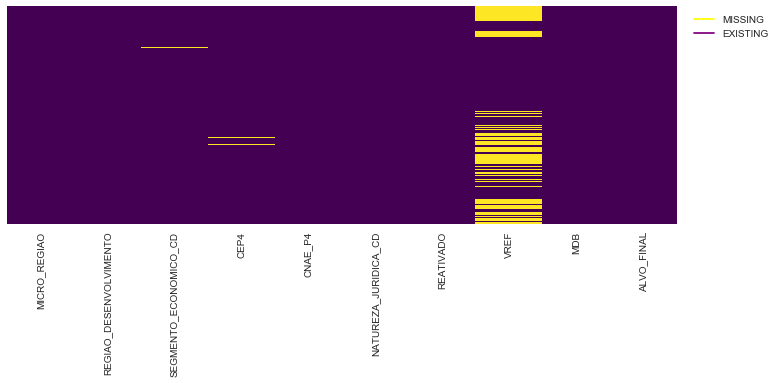

In [19]:
plt.figure(figsize=(12,4))
#FAKE PLOTS JUST TO DISPLAY THE LEGEND
plt.plot([], [], color='yellow', label='MISSING')
plt.plot([], [], color='purple', label='EXISTING')
# HEATMAP TO DISPLAY THE MISSING DATA
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.legend(bbox_to_anchor=(1.15, 1))

## ESTRATEGIA PARA INTERPOLACAO DE VREF

    - CADA VALOR NULO SERA SUBSTITUIDO PELA MEDIA DO VRF POR 
      REGIA_DESENVOLVIMENTO

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

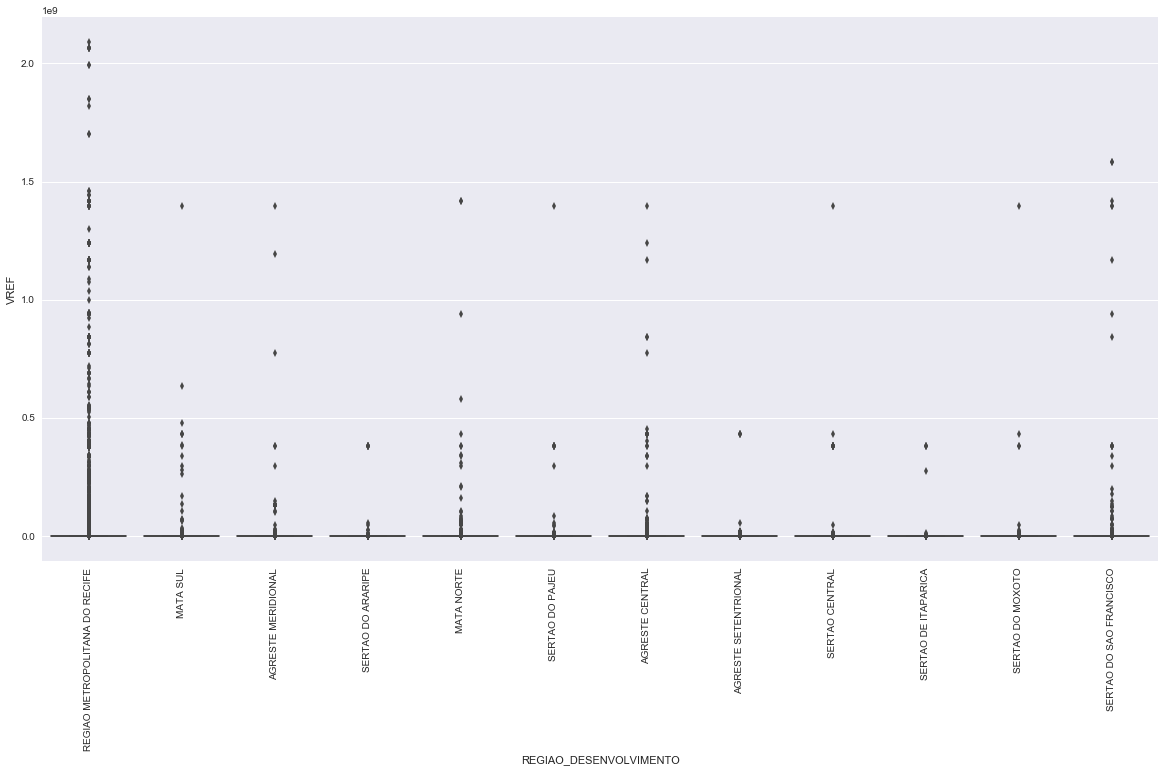

In [26]:
plt.figure(figsize=(20,10))
plot = sns.boxplot(x='REGIAO_DESENVOLVIMENTO', y='VREF', data=df)
plt.xticks(rotation=90)

In [27]:
rg_dev = df['REGIAO_DESENVOLVIMENTO'].unique()
avg_vals = []

for rg in rg_dev:
    rg_mean = df[df['REGIAO_DESENVOLVIMENTO'] == rg]['VREF'].mean()
    avg_vals.append(rg_mean)

print len(df['REGIAO_DESENVOLVIMENTO'].unique())
print len(avg_vals)

print df['REGIAO_DESENVOLVIMENTO'].unique()
print avg_vals

12
12
['REGIAO METROPOLITANA DO RECIFE' 'MATA SUL' 'AGRESTE MERIDIONAL'
 'SERTAO DO ARARIPE' 'MATA NORTE' 'SERTAO DO PAJEU' 'AGRESTE CENTRAL'
 'AGRESTE SETENTRIONAL' 'SERTAO CENTRAL' 'SERTAO DE ITAPARICA'
 'SERTAO DO MOXOTO' 'SERTAO DO SAO FRANCISCO']
[1156556.8536576594, 306613.61972579849, 480026.4284319111, 251568.43900414938, 491339.93947139964, 394282.61948610016, 357970.51241567987, 97756.96729645005, 944816.04325699748, 447332.40596928424, 402171.08333333331, 705474.11374989047]


In [28]:
## MAPPING FUNCTION
def avg(cols):
    rg_ = cols[0]
    vrf = cols[1]
    if pd.isnull(vrf):
        for idx, rg in enumerate(rg_dev):
            if rg_ == rg:
                return avg_vals[idx]
    else:
        return vrf

In [29]:
# OVERRIDING
df['VREF'] = df[['REGIAO_DESENVOLVIMENTO', 'VREF']].apply(avg, axis=1)

In [30]:
df.head()

,MICRO_REGIAO,REGIAO_DESENVOLVIMENTO,SEGMENTO_ECONOMICO_CD,CEP4,CNAE_P4,NATUREZA_JURIDICA_CD,REATIVADO,VREF,MDB,ALVO_FINAL
0,RECIFE,REGIAO METROPOLITANA DO RECIFE,9.0,5002.0,47423,23,1,1.156557e+06,N,0
1,RECIFE,REGIAO METROPOLITANA DO RECIFE,7.0,5205.0,31012,23,1,1.156557e+06,N,0
2,RECIFE,REGIAO METROPOLITANA DO RECIFE,9.0,5067.0,47440,33,1,1.156557e+06,N,0
3,RECIFE,REGIAO METROPOLITANA DO RECIFE,7.0,5072.0,17214,23,1,1.156557e+06,N,0
4,RECIFE,REGIAO METROPOLITANA DO RECIFE,17.0,5010.0,56112,23,1,1.156557e+06,N,0


In [31]:
sum(df['VREF'].isnull())

0

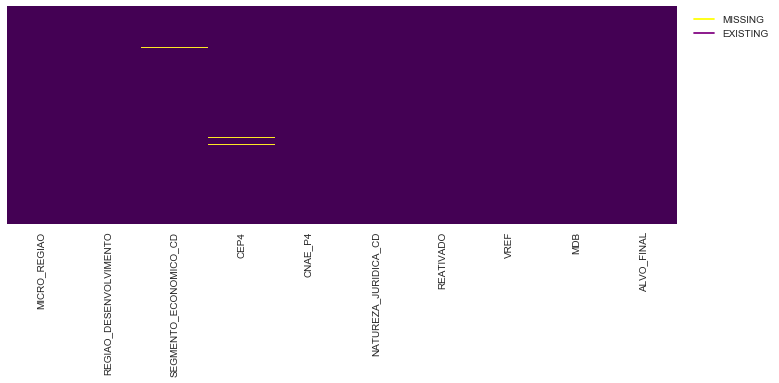

In [85]:
plt.figure(figsize=(12,4))
#FAKE PLOTS JUST TO DISPLAY THE LEGEND
plt.plot([], [], color='yellow', label='MISSING')
plt.plot([], [], color='purple', label='EXISTING')
# HEATMAP TO DISPLAY THE MISSING DATA
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.legend(bbox_to_anchor=(1.15, 1))

In [32]:
# JUST DROP THE REMAINING MISSING ROWS
df.dropna(inplace=True)

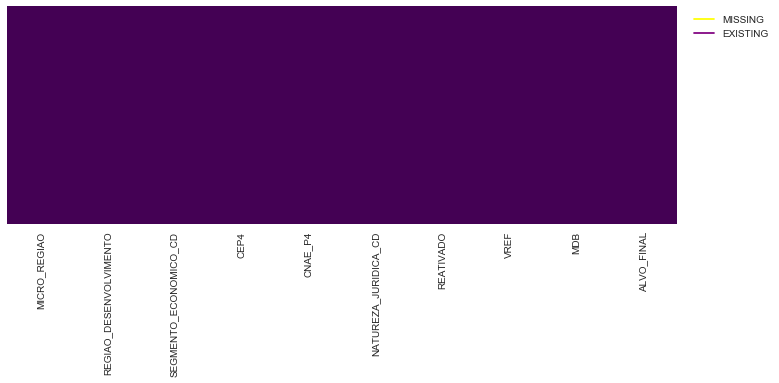

In [88]:
plt.figure(figsize=(12,4))
#FAKE PLOTS JUST TO DISPLAY THE LEGEND
plt.plot([], [], color='yellow', label='MISSING')
plt.plot([], [], color='purple', label='EXISTING')
# HEATMAP TO DISPLAY THE MISSING DATA
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.legend(bbox_to_anchor=(1.15, 1))

## TRATAMENTO DAS COLUNAS CATEGORICAS

In [33]:
#ELIMINACAO DO CEP, CNAE
comp = df.drop(labels=['CEP4', 'CNAE_P4'], axis=1)

In [34]:
comp.head()

,MICRO_REGIAO,REGIAO_DESENVOLVIMENTO,SEGMENTO_ECONOMICO_CD,NATUREZA_JURIDICA_CD,REATIVADO,VREF,MDB,ALVO_FINAL
0,RECIFE,REGIAO METROPOLITANA DO RECIFE,9.0,23,1,1.156557e+06,N,0
1,RECIFE,REGIAO METROPOLITANA DO RECIFE,7.0,23,1,1.156557e+06,N,0
2,RECIFE,REGIAO METROPOLITANA DO RECIFE,9.0,33,1,1.156557e+06,N,0
3,RECIFE,REGIAO METROPOLITANA DO RECIFE,7.0,23,1,1.156557e+06,N,0
4,RECIFE,REGIAO METROPOLITANA DO RECIFE,17.0,23,1,1.156557e+06,N,0


In [35]:
comp_cols = list(comp.columns)
comp_cols.remove('VREF')
comp_cols.remove('ALVO_FINAL')

In [36]:
for col in comp_cols:
    comp = pd.concat(objs=[comp, pd.get_dummies(comp[col])], axis=1)
comp.drop(labels=comp_cols, axis=1, inplace=True)

In [37]:
comp.head()

,VREF,ALVO_FINAL,ALTO CAPIBARIBE,ARARIPINA,BREJO PERNAMBUCANO,FERNANDO DE NORONHA,GARANHUNS,ITAMARAC�,ITAPARICA,MATA MERIDIONAL PERNAMBUCANA,...,0,1,A,B,C,D,E,F,N,Z
0,1.156557e+06,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,1.156557e+06,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,1.156557e+06,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,1.156557e+06,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,1.156557e+06,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [38]:
comp.to_csv('data/transformed.csv')

## CLASSIFICACAO E RESULTADOS

In [91]:
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

In [94]:
X = comp.drop(labels=['ALVO_FINAL'], axis=1)
y = comp['ALVO_FINAL']

In [95]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [96]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [97]:
print X_train.shape
print X_test.shape

(452792, 76)
(194054, 76)


## REDE NEURAL - MODEL FIT AND SCORE & METRICS

SCORE: 0.927607779278
             precision    recall  f1-score   support

          0       0.93      1.00      0.96    180006
          1       0.00      0.00      0.00     14048

avg / total       0.86      0.93      0.89    194054



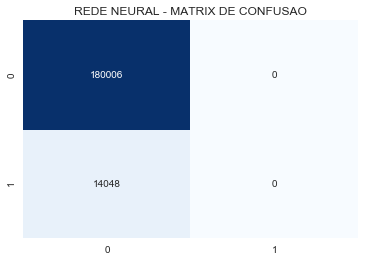

In [87]:
dim = X.shape[1]
clf = MLPClassifier(activation='logistic', solver='adam', alpha=1e-5, hidden_layer_sizes=(dim / 2, dim, 2 * dim),
                    random_state=1)
clf.fit(X_train, y_train)
print 'SCORE: {}'.format(clf.score(X_test, y_test))

preds = clf.predict(X_test)
cfm = confusion_matrix(y_test, preds)
sns.heatmap(cfm , annot=True, cbar=False, fmt='g', cmap='Blues')
plt.title('REDE NEURAL - MATRIX DE CONFUSAO')

print classification_report(y_test, preds)

## RANDOM FOREST - MODEL FIT AND SCORE & METRICS

SCORE: 0.924835355107
             precision    recall  f1-score   support

          0       0.93      1.00      0.96    179826
          1       0.13      0.00      0.01     14228

avg / total       0.87      0.92      0.89    194054



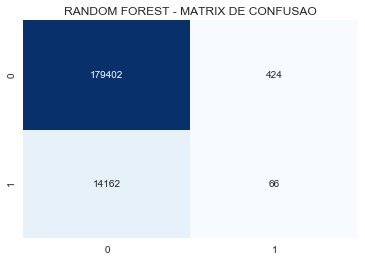

In [65]:
clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=2, random_state=0)
clf.fit(X_train, y_train)
print 'SCORE: {}'.format(clf.score(X_test, y_test))

preds = clf.predict(X_test)
cfm = confusion_matrix(y_test, preds)
sns.heatmap(cfm , annot=True, cbar=False, fmt='g', cmap='Blues')
plt.title('RANDOM FOREST - MATRIX DE CONFUSAO')

print classification_report(y_test, preds)

## REDE NEURAL - REDUCAO DE DIMENSAO COM RANDOM PROJECTIONS

BEFORE RANDOM PROJECTIONS
(452792, 76)
(194054, 76)
AFTER RANDOM PROJECTIONS
(452792, 5)
(194054, 5)
SCORE: 0.927607779278
             precision    recall  f1-score   support

          0       0.93      1.00      0.96    180006
          1       0.00      0.00      0.00     14048

avg / total       0.86      0.93      0.89    194054



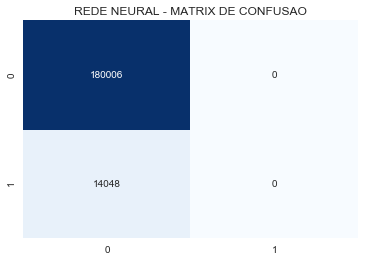

In [86]:
from sklearn.random_projection import GaussianRandomProjection

print 'BEFORE RANDOM PROJECTIONS'
print X_train.shape
print X_test.shape

tf = GaussianRandomProjection(n_components=5)
X_train = tf.fit_transform(X_train)
X_test = tf.transform(X_test)

print 'AFTER RANDOM PROJECTIONS'
print X_train.shape
print X_test.shape

dim = X.shape[1]
clf = MLPClassifier(activation='logistic', solver='adam', alpha=1e-5, hidden_layer_sizes=(dim / 2, dim, 2 * dim),
                    random_state=1)
clf.fit(X_train, y_train)
print 'SCORE: {}'.format(clf.score(X_test, y_test))

preds = clf.predict(X_test)
cfm = confusion_matrix(y_test, preds)
sns.heatmap(cfm , annot=True, cbar=False, fmt='g', cmap='Blues')
plt.title('REDE NEURAL - MATRIX DE CONFUSAO')

print classification_report(y_test, preds)

## RANDOM FOREST - REDUCAO DE DIMENSAO COM RANDOM PROJECTIONS

BEFORE RANDOM PROJECTIONS
(452792, 76)
(194054, 76)
AFTER RANDOM PROJECTIONS
(452792, 10)
(194054, 10)
SCORE: 0.9255825698
             precision    recall  f1-score   support

          0       0.93      1.00      0.96    179994
          1       0.13      0.00      0.01     14060

avg / total       0.87      0.93      0.89    194054



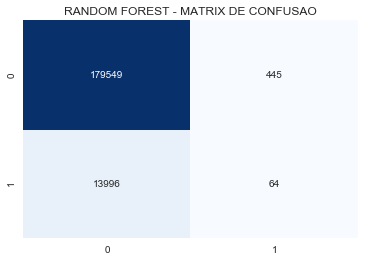

In [82]:
from sklearn.random_projection import GaussianRandomProjection

print 'BEFORE RANDOM PROJECTIONS'
print X_train.shape
print X_test.shape

tf = GaussianRandomProjection(n_components=10)
X_train = tf.fit_transform(X_train)
X_test = tf.transform(X_test)

print 'AFTER RANDOM PROJECTIONS'
print X_train.shape
print X_test.shape

clf = RandomForestClassifier(n_estimators=10, max_depth=None, min_samples_split=5)
clf.fit(X_train, y_train)
print 'SCORE: {}'.format(clf.score(X_test, y_test))

preds = clf.predict(X_test)
cfm = confusion_matrix(y_test, preds)
sns.heatmap(cfm , annot=True, cbar=False, fmt='g', cmap='Blues')
plt.title('RANDOM FOREST - MATRIX DE CONFUSAO')

print classification_report(y_test, preds)

## REDE NEURAL - CURVA DE APRENDIZADO

Utilizando STRATIFIED K FOLD CROSS VALIDATION

In [ ]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=clf, X=X_train, y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='validation accuracy')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.tight_layout()

## REDE NEURAL - CURVA DE VALIDACAO

Utilizando STRATIFIED K FOLD CROSS VALIDATION

In [ ]:
from sklearn.model_selection import validation_curve
train_sizes, train_scores, test_scores = validation_curve(estimator=clf, X=X_train, y=y_train, 
                                                        train_sizes=np.linspace(0.1, 1.0, 10), cv=10, n_jobs=-1)

param_range = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(
                estimator=clf, 
                X=X_train, 
                y=y_train, 
                param_name='clf__alpha', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
plt.fill_between(param_range, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
plt.plot(param_range, test_mean, color='green', linestyle='--', marker='s', markersize=5,  label='validation accuracy')
plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
plt.xscale('log')
plt.legend(loc='lower right')
plt.xlabel('Parameter Alpha')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])
plt.tight_layout()